In [39]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [40]:
from sklearn.datasets.samples_generator import make_blobs 
np.random.seed(0)

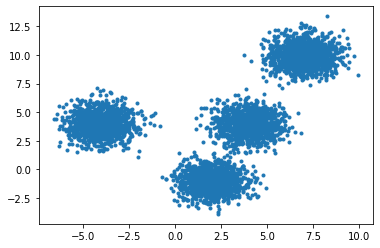

In [44]:
X,y = make_blobs(n_samples = 5000,centers = [[4,4],[2,-1],[7,10],[-4,4]],cluster_std=0.9)
plt.scatter(X[:,0],X[:,1],marker = '.')

In [60]:
k_means = KMeans(init = "k-means++",n_clusters = 4,n_init =12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.99802847,  3.94993252],
       [-4.01368835,  3.95714755],
       [ 1.99616589, -1.0032376 ],
       [ 6.99551046,  9.96096823]])

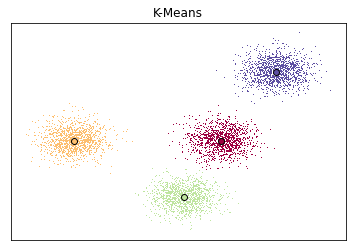

In [64]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)
for k,col in zip(range(len([[4,4],[-2,-2],[2,3],[1,1]])),colors):
    my_members = (k_means_labels ==k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members,0],X[my_members,1],'w',markerfacecolor =col,marker = ',')
    ax.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor =col, markeredgecolor = 'k',markersize =6 )
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [9]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [11]:
df=cust_df.drop('Address',axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [17]:
#modelling
ClusterNum = 3
k_means = KMeans(init='k-means++',n_clusters = ClusterNum,n_init = 12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [22]:
df['Clus_km'] = labels
df.head(5)
df.groupby('Clus_km').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1AD75328>>

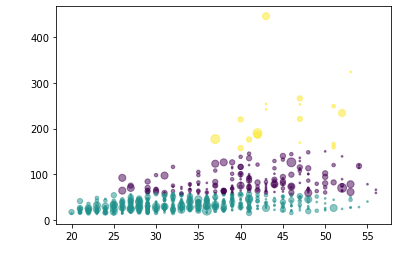

In [27]:
area = np.pi*(X[:,1]**2)
plt.scatter(X[:,0],X[:,3],s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel("Age",color = 'white',size= 20)
plt.ylabel("Income",color = 'white',size=20)
plt.show()

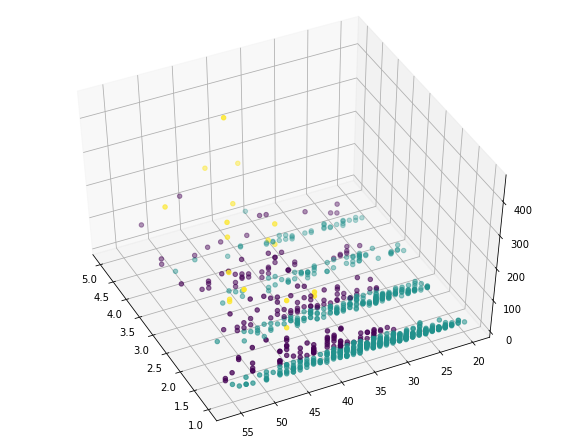

In [36]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0,.95,1],elev = 48,azim = 154)
plt.cla()
ax.set_xlabel("Education",fontsize = 20,color='white')
ax.set_ylabel("Age",fontsize = 20,color='white')
ax.set_zlabel("Income",fontsize = 20,color='white')
ax.scatter(X[:,1],X[:,0],X[:,3],c = labels.astype(np.float))
plt.show()